## Exploratory Data Analysis<a id='EDA'>

## Contents<a id='Contents'></a>
* [Exploratory Data Analysis](#EDA)
  * [Contents](#Contents)
  * [Introduction](#Introduction)
  * [Imports](#Imports)
  * [Load the Data](#Load_the_Data)
  * [Explore the Data](#Explore_the_data)
      * [Geographical visualization of the restuarants](#geographical_viz)
      * [The Top 20 Restaurants](#top_20)
          * [5-Star Distribution](#star_distribution)
          * [Sentiment Analysis](#sentiment_analysis)
              * [Text length distribution for each stars](#text_length_distribution)
              * [Function for target variable with 3 classes](#function_target)
              * [Word Cloud](#word_cloud)
                  * [Positive Word Cloud](#positive_word_cloud)
                  * [Negative Word Cloud](#negative_word_cloud)
                  * [Neutral Word Cloud](#neutral_word_cloud)
  * [Save data](#save_data)
  * [Summary](#summary)
    

## Introduction<a id='Introduction'></a>

Build a recommendation system model that could recommend people the restaurants near their location based on restaurant reviews from other people, drawing on sentiment analysis. 

For capstone 2 data science project, the dataset was taken from the Yelp Dataset, which has been made publicly available for personal, educational, and academic purposes. Due to the sheer size of this dataset, I decided to concentrate my efforts on restaurant reviews data in the city of Philadelpiha as it had the most number of reviews as compared to other cities dataset. I will doing EDA on the data which has <b>3,460 <u>Restaurants</u>, <u>84,238 Users</u>, and 192,386 <u>Restaurant Reviews</u> in Philadelphia from <u>2018–2022</u>.</b>

### Imports<a id='Imports'>

In [139]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# remove war
import warnings
warnings.filterwarnings('ignore')
# this will allow ploting inside the notebook
%matplotlib inline
# remove punctuation
import string
# remove stopwords
from nltk.corpus import stopwords

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.stem import SnowballStemmer

from sklearn.feature_extraction.text import CountVectorizer



### Load the Data<a id ='Load_the_Data'>

In [2]:
philly_data = pd.read_csv('clean_cp2_philly_data.csv')

In [3]:
philly_data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,review_count,categories,review_id,user_id,yelp_review_stars,useful,funny,cool,text,date,year
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",MKNp_CdR2k2202-c8GN5Dw,3-1va0IQfK-9tUMzfHWfTA,5,5,0,5,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57,2018
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",_hJu0u6nB-8LIeQJY4Vg4w,KQSRUu4Aapl0hG6eu2v8iw,4,1,0,0,This is my favorite bakery in Chinatown! I usu...,2018-03-17 23:47:25,2018
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",3LNKer0gTFgknV-2CyPjAg,z-yvbUGwFn8PAijEHdU_RA,5,0,0,0,While I've never tried their bao (and usually ...,2018-03-25 12:35:42,2018
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",ibUkH1a01VZgBD9ba6wocw,h-NFrVwhhCvxdle_3pBwiQ,5,1,0,0,Got my wedding cake here and it was the best d...,2018-04-12 20:59:21,2018
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",L3Qk84zgSO4U3IsZoz3G4w,2Gp0gQNpIVmShIt3-gOebw,4,1,0,0,Just came from this bakery this afternoon and ...,2018-05-05 22:26:47,2018


In [4]:
philly_data.shape

(192386, 19)

### Explore the Data<a id='Explore_the_data'>

In [5]:
philly_data['postal_code'].value_counts()

19107    38393
19103    22516
19147    19999
19106    13943
19104     9503
19102     9241
19123     8866
19148     7670
19130     7291
19125     6412
19146     4952
19128     3987
19127     3733
19145     3231
19122     3130
19143     2226
19149     2050
19153     1919
19114     1759
19118     1563
19131     1427
19116     1218
19134     1205
19115     1202
19152     1068
19119     1040
19140     1028
19136      955
19111      907
19120      896
19154      889
19144      833
19135      795
19139      739
19129      709
19121      667
19124      648
19151      496
19132      480
19126      480
19150      443
19138      443
19142      401
19141      317
19137      195
19133      154
19155      109
19112      107
19176      104
19087       15
19019       15
19195       10
19101        5
19113        2
Name: postal_code, dtype: int64

### Geographical visualization of the restuarants<a id='geographical_viz'> 

<strong>Note: Using Tableau I tried the visualization of the location for all the businesses and provided the public tableau link to filter on review counts and yelp stars</strong>

https://public.tableau.com/app/profile/anita.durg/viz/PhiladelphiaRestuarantEDA/Sheet3

In [195]:
from IPython.display import HTML, display, Markdown, Latex
 
# get the image
display(Markdown('<img src="../philadelphia_restaurant_reviews.png" style="height: 300px;"/>'))

<img src="../philadelphia_restaurant_reviews.png" style="height: 300px;"/>

From the Visualzation, I found that the lot of reviews are from the central loation of philadelphia as based on the postalcodes mentioned on the below wikipedia image:

In [198]:
# get the image
display(Markdown('<img src="../center_city_philadelphia.png" style="height: 300px;"/>'))


<img src="../center_city_philadelphia.png" style="height: 300px;"/>

In [197]:
philly_data['postal_code'].value_counts().loc[lambda x: x > 6500]

19107    38393
19103    22516
19147    19999
19106    13943
19104     9503
19102     9241
19123     8866
19148     7670
19130     7291
Name: postal_code, dtype: int64

### Analysis on the top 20 Restaurants<a id='top_20'>

In [21]:
philly_data.name.value_counts().index[:20].tolist()

['Reading Terminal Market',
 'Dalessandro’s Steaks & Hoagies',
 'Dim Sum Garden',
 'Chubby Cattle',
 'Suraya',
 'Green Eggs Café',
 'Zahav',
 'Parc',
 "Sabrina's Café",
 'Barbuzzo',
 'El Vez',
 "Jim's South St",
 'Terakawa Ramen',
 "Pat's King of Steaks",
 'Cleavers',
 'The Dandelion',
 "Geno's Steaks",
 'Sampan',
 'Double Knot',
 "Talula's Garden"]

In [17]:
top_20_restaurants = philly_data.name.value_counts().index[:20].tolist()

In [18]:
df_review_top_20 = philly_data.loc[philly_data['name'].isin(top_20_restaurants)]

In [19]:
df_review_top_20.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,review_count,categories,review_id,user_id,yelp_review_stars,useful,funny,cool,text,date,year
7577,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",WeTHLEdLdP3Y3AXWWCsx4g,UizCd11Qoo74BKARrZp7HA,5,0,0,1,We are visiting in Philadelphia from Californi...,2018-05-28 21:27:38,2018
7578,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",MrWpfvjVA6Qtj3CDvFfPiA,49aswoS-d09tyWNJimzZ5A,5,1,0,0,Delicious food ! I personally loved it !!!\n\n...,2018-02-01 19:28:41,2018
7579,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",hll3PKZbMbu2W7uFbF8ezQ,CmLK8cjvcUIKyNVMp8ZyDA,2,0,0,0,Beautiful place. Excellent food. I only gave i...,2018-08-24 13:30:41,2018
7580,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",Mi5lScAdCWuJZj0QO_4qxg,wG77jgwRg53rN1KVxo637w,2,0,0,0,"It's extremely overpriced, and the sandwiches ...",2018-02-11 18:04:01,2018
7581,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",SSu94Tvc6L5UBC4FDDyAbw,5s0nTuLRm3ue4Qfrj9PHkQ,5,0,0,0,Instagram worthy and Claire is an amazing serv...,2018-05-28 23:07:50,2018


In [20]:
df_review_top_20.shape

(19697, 19)

I had 511257 entries with 19 columns prior to getting only top 30 restaurants. 

I feel 25K is a good amount of dataset which my system can handle. 

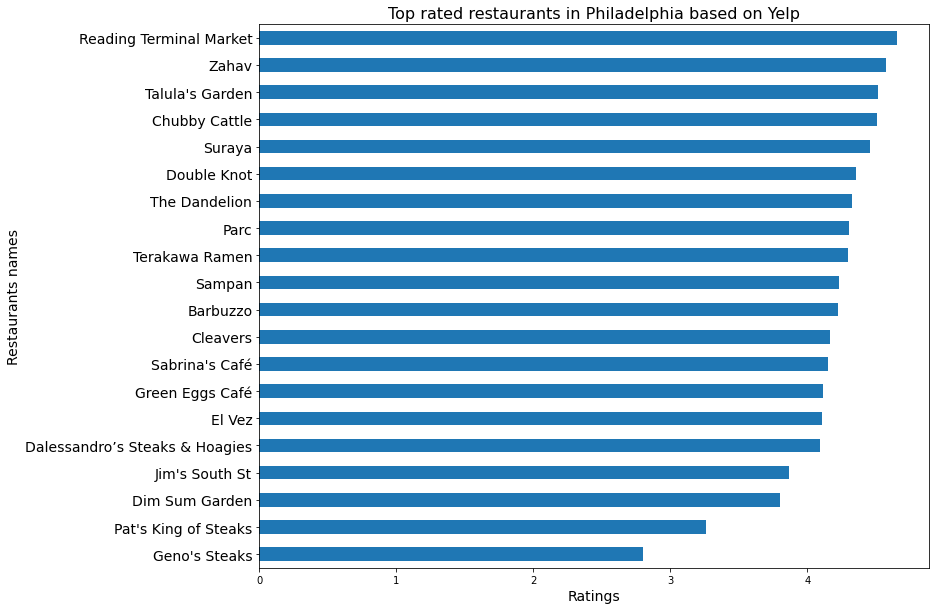

In [25]:
df_review_top_20.groupby(df_review_top_20.name)['yelp_review_stars'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))
plt.yticks(fontsize=14)
plt.title('Top rated restaurants in Philadelphia based on Yelp',fontsize=16)
plt.ylabel('Restaurants names', fontsize=14)
plt.xlabel('Ratings', fontsize=14)
plt.show()

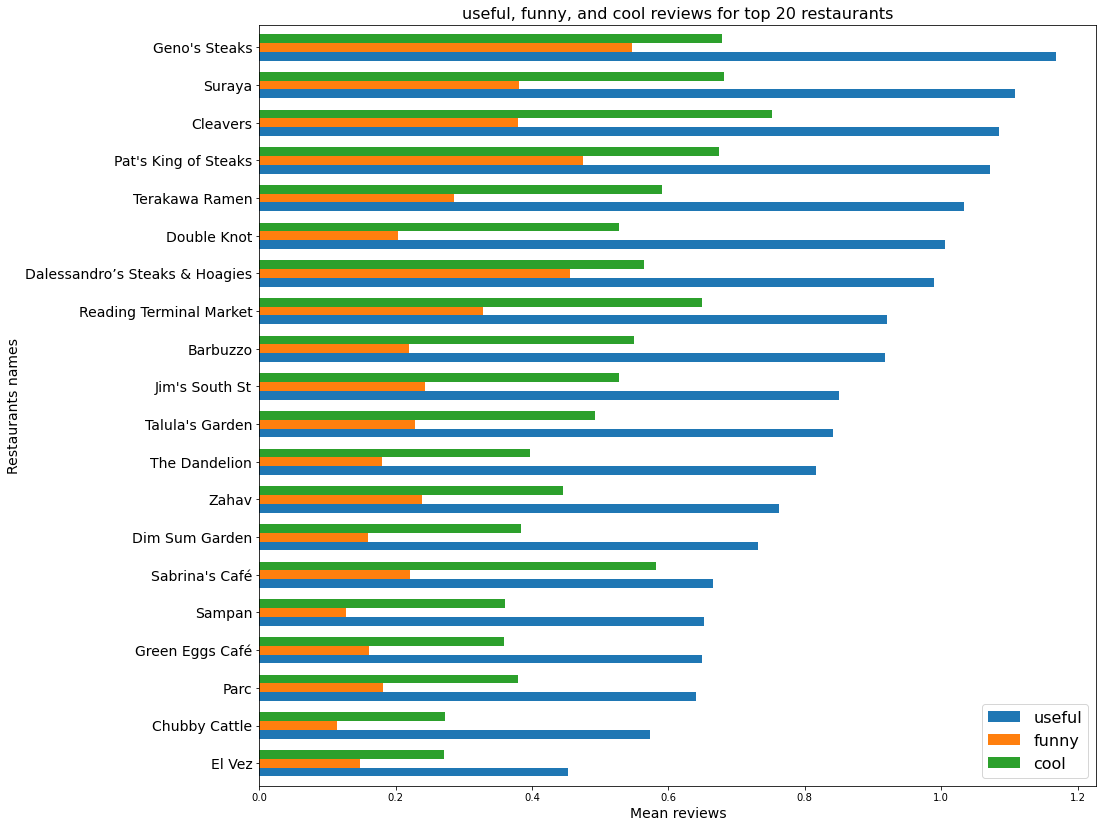

In [97]:
# now we take the name column and count mean of 'useful','funny', 'cool' of each unique business name
# then sort values in ascending order 
# then plot the graph
df_review_top_20.groupby(df_review_top_20.name)[['useful','funny', 'cool']].mean().sort_values('useful',ascending=True).plot(kind='barh', figsize=(15, 14),width=0.7)
plt.yticks(fontsize=14)
plt.title('useful, funny, and cool reviews for top 20 restaurants',fontsize=16)
plt.ylabel('Restaurants names', fontsize=14)
plt.xlabel('Mean reviews', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.show()

Looks like people do find the reviews useful as it might help them to decide to choose which places to go to.

### 5-star distribution<a id='star_distribution'>

In [74]:
df_review_top_20.yelp_review_stars.unique()

array([5, 2, 4, 3, 1], dtype=int64)

In [75]:
x_val=df_review_top_20['yelp_review_stars'].value_counts().index
print(x_val)

Int64Index([5, 4, 3, 1, 2], dtype='int64')


In [76]:
y_val=df_review_top_20['yelp_review_stars'].value_counts()
print(y_val)

5    11034
4     4450
3     1975
1     1183
2     1055
Name: yelp_review_stars, dtype: int64


Text(0.5, 1.0, 'Distribution of yelp review stars')

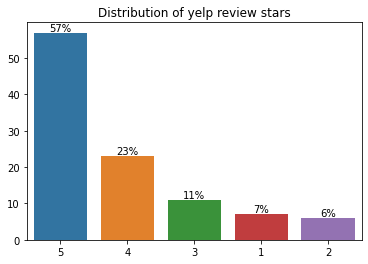

In [180]:
import math
total_review_count = np.sum(df_review_top_20['yelp_review_stars'].value_counts())
#print(total_review_count)
my_stars_percent=[]
new_star_dict = {stars: math.ceil((my_val/total_review_count)*100) for stars,my_val in zip(df_review_top_20['yelp_review_stars'].value_counts().index,df_review_top_20['yelp_review_stars'].value_counts())}
#print(new_star_dict)
perc =  [i for i in new_star_dict.values()]
#print(perc)
ax=sns.barplot(x=list(new_star_dict.keys()),y=perc,order=x_val)
#ax = sns.barplot(x=list(new_star_dict.keys()),y=perc,data=new_star_dict, errwidth=0)

# now simply assign the bar values to
# each bar by passing containers method
# to bar_label function
ax.bar_label(ax.containers[0],fmt='%.0f%%')
ax.set_title('Distribution of yelp review stars')

    

### Sentiment Analysis for the top 20 restaurants<a id='sentiment_analysis'>

In [98]:
sentiment_df = df_review_top_20


In [99]:
sentiment_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,review_count,categories,review_id,user_id,yelp_review_stars,useful,funny,cool,text,date,year
7577,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",WeTHLEdLdP3Y3AXWWCsx4g,UizCd11Qoo74BKARrZp7HA,5,0,0,1,We are visiting in Philadelphia from Californi...,2018-05-28 21:27:38,2018
7578,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",MrWpfvjVA6Qtj3CDvFfPiA,49aswoS-d09tyWNJimzZ5A,5,1,0,0,Delicious food ! I personally loved it !!!\n\n...,2018-02-01 19:28:41,2018
7579,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",hll3PKZbMbu2W7uFbF8ezQ,CmLK8cjvcUIKyNVMp8ZyDA,2,0,0,0,Beautiful place. Excellent food. I only gave i...,2018-08-24 13:30:41,2018
7580,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",Mi5lScAdCWuJZj0QO_4qxg,wG77jgwRg53rN1KVxo637w,2,0,0,0,"It's extremely overpriced, and the sandwiches ...",2018-02-11 18:04:01,2018
7581,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",SSu94Tvc6L5UBC4FDDyAbw,5s0nTuLRm3ue4Qfrj9PHkQ,5,0,0,0,Instagram worthy and Claire is an amazing serv...,2018-05-28 23:07:50,2018


In [100]:
sentiment_df.shape

(19697, 19)

In [101]:
#calculate the the length of each review text
list_review=[]
for i in sentiment_df['text']:
    list_review.append(len(i))

In [102]:
sentiment_df['text_length']=list_review

In [103]:
sentiment_df.shape

(19697, 20)

In [104]:
sentiment_df.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,review_count,categories,review_id,user_id,yelp_review_stars,useful,funny,cool,text,date,year,text_length
7577,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",WeTHLEdLdP3Y3AXWWCsx4g,UizCd11Qoo74BKARrZp7HA,5,0,0,1,We are visiting in Philadelphia from Californi...,2018-05-28 21:27:38,2018,614
7578,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",MrWpfvjVA6Qtj3CDvFfPiA,49aswoS-d09tyWNJimzZ5A,5,1,0,0,Delicious food ! I personally loved it !!!\n\n...,2018-02-01 19:28:41,2018,573
7579,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",hll3PKZbMbu2W7uFbF8ezQ,CmLK8cjvcUIKyNVMp8ZyDA,2,0,0,0,Beautiful place. Excellent food. I only gave i...,2018-08-24 13:30:41,2018,362


### Text length distribution for each stars<a id='text_length_distribution'>

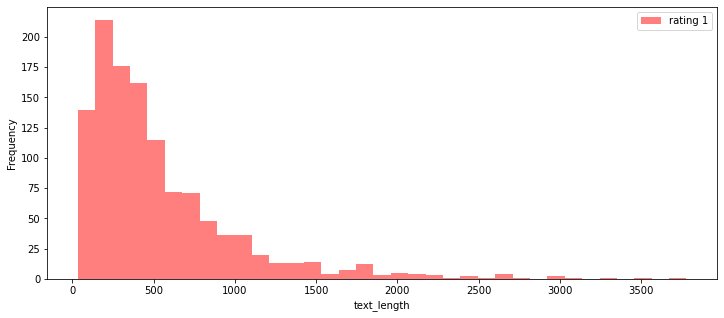

In [107]:
plt.figure(figsize=(12,5))
sentiment_df[sentiment_df['yelp_review_stars']==1]['text_length'].plot(bins=35,alpha=0.5,kind='hist',color='red',label='rating 1')
plt.legend()
plt.xlabel('text_length')
plt.show()

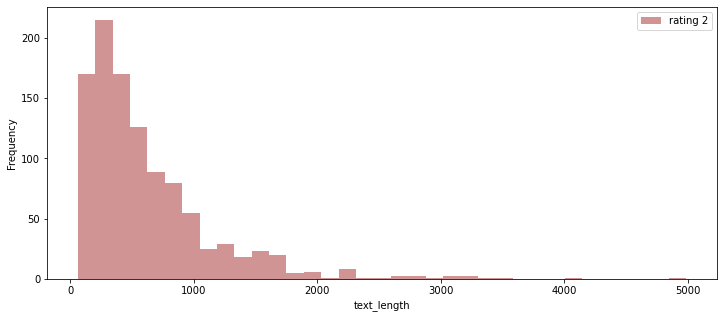

In [109]:
plt.figure(figsize=(12,5))
sentiment_df[sentiment_df['yelp_review_stars']==2]['text_length'].plot(bins=35,alpha=0.5,kind='hist',color='brown',label='rating 2')
plt.legend()
plt.xlabel('text_length')
plt.show()

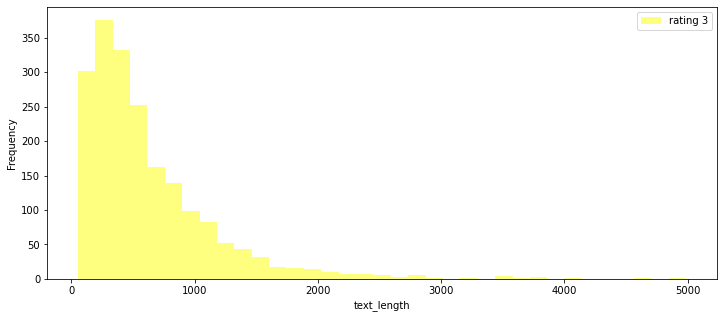

In [110]:
plt.figure(figsize=(12,5))
sentiment_df[sentiment_df['yelp_review_stars']==3]['text_length'].plot(bins=35,alpha=0.5,kind='hist',color='yellow',label='rating 3')
plt.legend()
plt.xlabel('text_length')
plt.show()

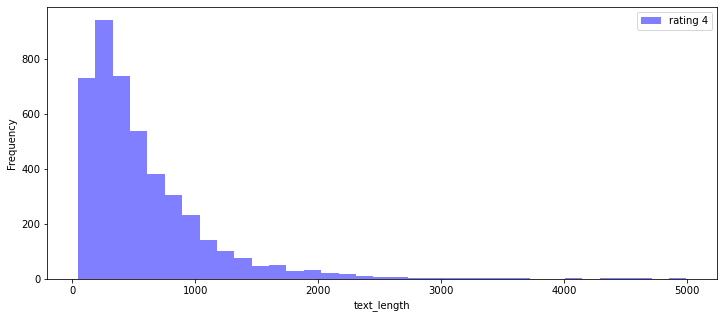

In [111]:
plt.figure(figsize=(12,5))
sentiment_df[sentiment_df['yelp_review_stars']==4]['text_length'].plot(bins=35,alpha=0.5,kind='hist',color='blue',label='rating 4')
plt.legend()
plt.xlabel('text_length')
plt.show()

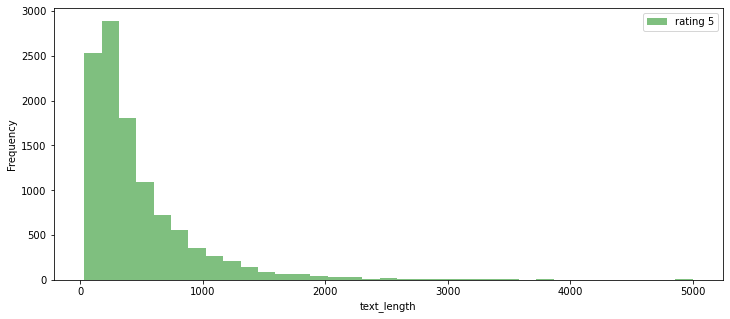

In [112]:
plt.figure(figsize=(12,5))
sentiment_df[sentiment_df['yelp_review_stars']==5]['text_length'].plot(bins=35,alpha=0.5,kind='hist',color='Green',label='rating 5')
plt.legend()
plt.xlabel('text_length')
plt.show()

### Function for target variable with 3 classes<a id='function_target'>

In [182]:
# create function to fill the target value which will be 'Liked'
def create_target(stars):
    if stars < 3:
        target = 1 # negative
    elif stars > 3:
        target = 0 # positive
    else:
        target = 2 # neutral
    return target

In [183]:
# store the value into 'liked' column which will be our target
sentiment_df['target'] = sentiment_df.yelp_review_stars.apply(create_target)

In [181]:
sentiment_df.shape

(19697, 21)

In [184]:
sentiment_df.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,review_count,categories,...,user_id,yelp_review_stars,useful,funny,cool,text,date,year,text_length,target
7577,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",...,UizCd11Qoo74BKARrZp7HA,5,0,0,1,We are visiting in Philadelphia from Californi...,2018-05-28 21:27:38,2018,614,0
7578,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",...,49aswoS-d09tyWNJimzZ5A,5,1,0,0,Delicious food ! I personally loved it !!!\n\n...,2018-02-01 19:28:41,2018,573,0
7579,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",...,CmLK8cjvcUIKyNVMp8ZyDA,2,0,0,0,Beautiful place. Excellent food. I only gave i...,2018-08-24 13:30:41,2018,362,1
7580,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",...,wG77jgwRg53rN1KVxo637w,2,0,0,0,"It's extremely overpriced, and the sandwiches ...",2018-02-11 18:04:01,2018,254,1
7581,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",...,5s0nTuLRm3ue4Qfrj9PHkQ,5,0,0,0,Instagram worthy and Claire is an amazing serv...,2018-05-28 23:07:50,2018,1167,0


In [185]:
sentiment_df['target'].value_counts()

0    15484
1     2238
2     1975
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

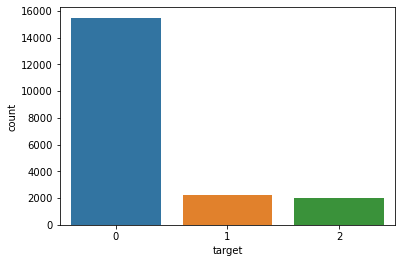

In [186]:
sns.countplot(sentiment_df['target'])

In [187]:
positive=[]
negative=[]
neutral=[]
positive_txt_reviews=sentiment_df[sentiment_df['target']==0]['text']
negative_txt_reviews=sentiment_df[sentiment_df['target']==1]['text']
neutral_txt_reviews=sentiment_df[sentiment_df['target']==2]['text']

In [124]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [126]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [188]:
def extract_positive(positive_txt_reviews):
    global positive
    words = [word.lower() for word in word_tokenize(positive_txt_reviews) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    positive=positive+words

In [189]:
def extract_negative(negative_txt_reviews):
    global negative
    words = [word.lower() for word in word_tokenize(negative_txt_reviews) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    negative=negative+words

In [190]:
def extract_neutral(neutral_txt_reviews):
    global neutral
    words = [word.lower() for word in word_tokenize(neutral_txt_reviews) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    neutral=neutral+words

In [191]:
positive_txt_reviews.apply(extract_positive)
negative_txt_reviews.apply(extract_negative)
neutral_txt_reviews.apply(extract_neutral)

KeyboardInterrupt: 

### Word Cloud<a id='word_cloud'>

#### Positive Word Cloud<a id='positive_word_cloud'>

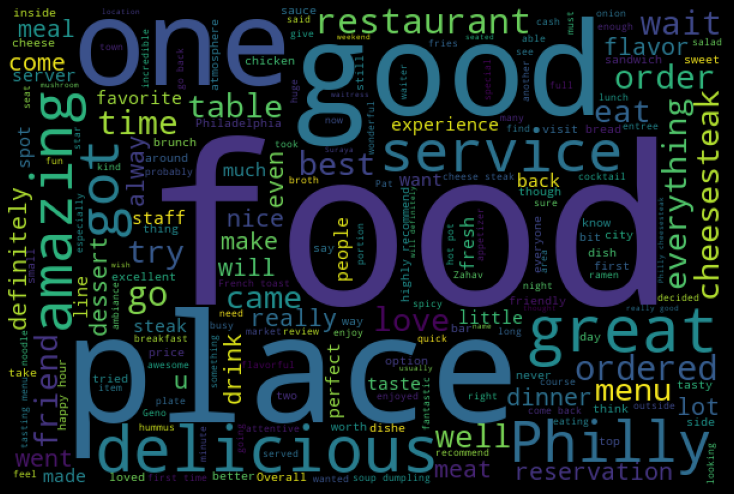

In [141]:
from wordcloud import WordCloud
pos_review_cloud=WordCloud(width=600,height=400).generate(" ".join(positive_txt_reviews))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(pos_review_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Negative Word Cloud<a id='negative_word_cloud'>

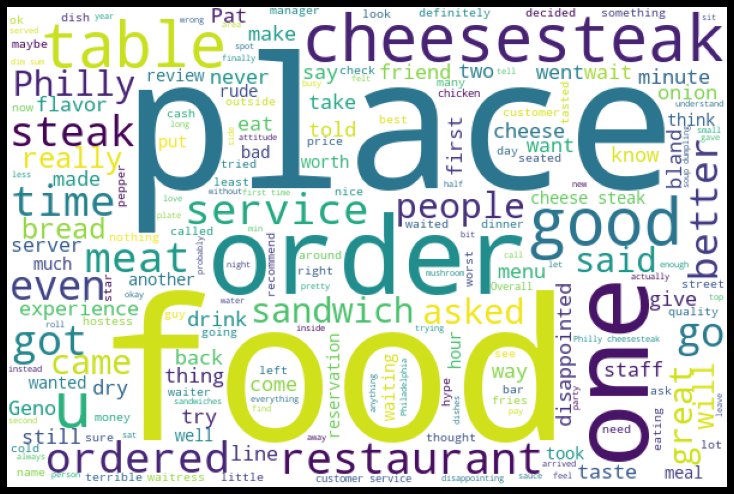

In [142]:
neg_review_cloud=WordCloud(width=600,height=400,background_color='white').generate(" ".join(negative_txt_reviews))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(neg_review_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Neutral Word Cloud<a id='neutral_word_cloud'>

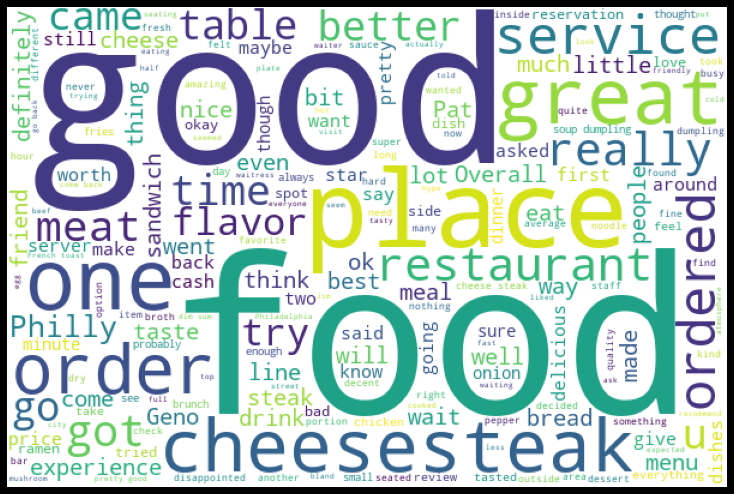

In [145]:
neut_review_cloud=WordCloud(width=600,height=400,background_color='white').generate(" ".join(neutral_txt_reviews))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(neut_review_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Save data<a id='save_data'>

In [192]:
sentiment_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,review_count,categories,...,user_id,yelp_review_stars,useful,funny,cool,text,date,year,text_length,target
7577,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",...,UizCd11Qoo74BKARrZp7HA,5,0,0,1,We are visiting in Philadelphia from Californi...,2018-05-28 21:27:38,2018,614,0
7578,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",...,49aswoS-d09tyWNJimzZ5A,5,1,0,0,Delicious food ! I personally loved it !!!\n\n...,2018-02-01 19:28:41,2018,573,0
7579,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",...,CmLK8cjvcUIKyNVMp8ZyDA,2,0,0,0,Beautiful place. Excellent food. I only gave i...,2018-08-24 13:30:41,2018,362,1
7580,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",...,wG77jgwRg53rN1KVxo637w,2,0,0,0,"It's extremely overpriced, and the sandwiches ...",2018-02-11 18:04:01,2018,254,1
7581,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",...,5s0nTuLRm3ue4Qfrj9PHkQ,5,0,0,0,Instagram worthy and Claire is an amazing serv...,2018-05-28 23:07:50,2018,1167,0


In [193]:
#saving this file
csv_name = "cp2_sentiment_df.csv"
sentiment_df.to_csv(csv_name, index=False)

### Summary<a id='summary'>

Explored the yelp datasets and extracted most occuring resturant(Top 20). Using Tableau I was able to visualize where the most reviewed restaurants are located. They are mostly in central region of Philadelphia. Using Seaborn, I tried to show the distribution of stars and their corresponding percentages. Observed that there are more number of 5-star and 4-stars and low numbers of 1,2 3 stars. Also observed that the review text is very length for 4 and 5 and less text length for 1,2, and 3 stars. I also explored useful, cool and funny and observed that cool and funny are more than Funny. Explored the Word cloud and displayed the clouds for three categories viz., positive, negative, neutral

Based on all these observations, I am going to start the preprocessing on reviews text and newly formed target variable to predict the target based on the sentiments. 